#### **Step 0: Machine Learning: Concept**

##### **How the models work ?**
1. Use historical data to identify pattern
2. Decide how to break the houses into two groups
    - Model Training (Model Fitting) = Train the model to capture patterns from data
3. Determine the Prediction (predicted price in each group)
    - Use the trained model (Fit model) to predict target label on validation dataset

##### **How to build a basic model ?**

1. **Define:** 
    * What type of model will it be ? (e.g. decision tree) 
    * Some other parameters of the model type are specifi ed too.
2. **Fit:**
    * Capture patterns from provided data
3. **Predict:**
    * Use the trained model based on training dataset (X_train, y_train) to predict the target using validation data (X_valid) 
4. **Evaluate:**
    * Determine how accurate the model's predictions are

##### **E.g.: The simplest model: Decision Tree**
* Greater depth allows for more splits, enabling finer pattern recognition.
* Predictions are made at the terminal nodes, known as leaves.
    * E.g., Predicting Target = House Price 

    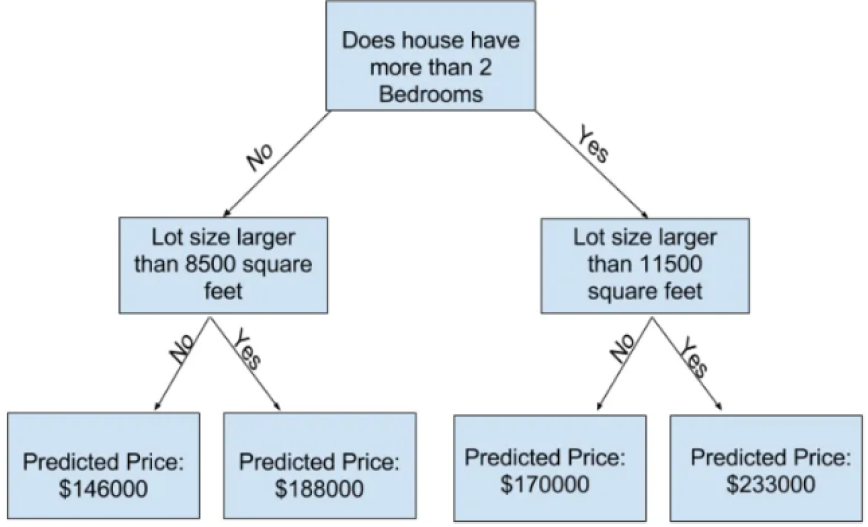

##### **E.g.: Random Forest**
* Use many decision trees to make prediction by averaging the predictions of each component tree.
* Prediction = average (regression) or majority vote (classifi cation) of trees
    * **Pros:** Higher accuracy than a single decision tree, works well with default parameters
    * **Cons:** Better models exist but often need fi ne-tuning (sensitive to parameters)

##### **Underfitting VS Overfitting**
**Goal:** Find the sweet spot between underfitting and overfitting
* The lowest point on the validation error curve = best performance on unseen data (measured via validation set).

**Validation data** (not used in training) helps measure model accuracy.
* We test multiple models and pick the best based on validation performance.

</br>
<table align='center'>
    <th>Overfitting</th>
    <th>Underfitting</th>
    <tr>
        <td>Model fi ts training data too well, learns noise/spurious patterns.</td>
        <td>Model is too simple to capture patterns.</td>
    </tr>
        <td>High accuracy on training, poor on validation/test data.</td>
        <td>Poor performance on both training and validation data.</td>
    <tr>
        <td>Deep trees, few data per leaf → unreliable generalisation. </br>
        (makes predictions close to the actual values)</td>
        <td>Shallow trees, large data per leaf → overly broad predictions.</td>
    </tr>
</table>


---
#### **Step 1: Import Libraries**

In [63]:
# For Data Manipulation, Exploration, Visualization, and Analysis
# Data Type: Pandas DataFrame - can hold the data in tabular form
import pandas as pd

# For Machine Learning Workflow: Preprocessing, Fitting, Inference, Evaluation, etc.
# Works with Pandas DataFrame
import sklearn

#### **Step 2: Load the Data**

In [21]:
# House Prices Dataset from Kaggle
iowa_file_path = "data/Housing-Prices-Competition-for Kaggle-Learn-Users/train.csv" 
home_data = pd.read_csv(iowa_file_path)

#### **Step 3: Review the Data**

In [65]:
# Beautiful way of displaying tabular data, instead of print
from IPython.display import display

display(home_data.head())
# print(home_data.head())
# home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### **Step 4: Basic Data Cleaning**

**Note:**

some of the columns here contain NaN (Not a number) — meaning the data is not clean.

We need to see if its worth it to drop the NaN columns by counting no. of NaN in that column and compare with no. of rows.

In [41]:
home_data.shape

(1460, 81)

In [50]:
home_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [37]:
# Remove column with missing data (NaN)
home_data_cleaned = home_data.dropna(axis=1)   # axis = [row, col] = [axis=0, axis=1]

#### **Step 5: Specify Feature Matrix (X) and Prediction Target (y)**

**X : Feature matrix (input or independent variables)**
* Data that the model will use to make predictions.
* 2D NumPy / DataFrame

**y : Target vector (output or dependent variable)**
* Values that the model tries to predict
* 1D Array / Pandas Series

**Tips:**

* Use .copy() here 
    * After cleaning the data (E.g.: fillna(), dropna(), etc.)
    * So we can reuse X and y again for the next analysis in this same .ipynb notebook.

In [ ]:
# or y = home_data['SalePrice']
# Selecting Predicting Target y 
y = home_data_cleaned.SalePrice.copy()      # Dot Notation: only works for selecting 1 column
y = home_data_cleaned['SalePrice'].copy()   # Column list:  flexible for 1 or more no of column

# Selecting Feature Matrix X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'] 
X = home_data_cleaned[features].copy()

# for next anaylysis in the same notebook - you don't need to clean this dataset again, instead start from home_data_cleaned

#### **Step 6: Split the Dataset into Training and Validation dataset**

**Problem: Without Splitting**

* Using the same input data (X) for both training and prediction will lead to Perfect Prediction (y_pred = y), which is impossible!!!

**Solution: Split the data into training and validation/test sets**

* To test the model's ability to generalize to unseen data

**Note:**

* During training (.fit()): 
    * Use X_train, y_train → Train model (capture patterns) based on training sets
* During predicting (.predict())  
    * Use X_valid → by using trained model to predict based on validation sets

In [52]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)

#### **Step 7: Specify and fit the model**
(fit = train = Learn the pattern)

**DecisionTreeRegressor():**  

Decision Tree Regressor Model Instance

**random_state:** 

Set seed value to ensure same results each run Good practice to maintain the model quality.

**model.fit(X_train, y_train)** 

Train (fit) the model by learning the relationship between the features (X) and the target (y) using Decision Tree Regressor Algorithm.

In [53]:
from sklearn.tree import DecisionTreeRegressor

dtree_model = DecisionTreeRegressor(random_state=1)

dtree_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


#### **Step 8: Make (In-Sample) Prediction**

In [54]:
# Make a prediction of y based on the feature of validation dataset (X_valid) 
y_pred = dtree_model.predict(X_valid) 
y_pred[:10], y_pred.shape

(array([186500., 184000., 130000.,  92000., 164500., 220000., 335000.,
        144152., 215000., 262000.]),
 (365,))

#### **Step 9: Model Evaluation**

**Goal:**

to measure the model quality to iteratively improving your models.

**Measurements:**

1. **Predictive Accuracy:** will the model's predictions be close to what actually happens
2. **Problem: In-sample score**
    * measures model's performance on training data - makes model more accurate than it is.

**Solution:** Split data into training and validation datasets

* Use training dataset to train the model model.fi t(X_train, y_train) and making
* Use validation dataset to test make prediction and evaluate model accuracy
    * y_pred = model.predict(X_valid)
    * mae = mean_absolute_error(y_valid, y_pred)

$Mean\  Absolute\ Error\ (MAE) = avg(|y_{Actual}| - |y_{Predict}|) = avg(|y_{Predict}| - |y_{Actual}|)$

In [67]:
from sklearn.metrics import mean_absolute_error

val_mae = mean_absolute_error(y_pred, y_valid)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 29,653


#### **Step 10: Model Tuning - Approach 1: Use function-loop-list**

##### **Step 10.1: For Decision Tree Model - max_leaf_nodes (tree size)** 

In [68]:
# Using best value for max_leaf_nodes ( = tree depth - control overfitting vs underfitting)
def dtree_compare_max_leaf_nodes(max_leaf_nodes=100):
    dtree_model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    dtree_model.fit(X_train, y_train)
    y_pred = dtree_model.predict(X_valid)
    val_mae = mean_absolute_error(y_valid, y_pred)
    return round(val_mae,2)

list_max_leaf_nodes = []
for i in range(20, 200, 20):
    print(dtree_compare_max_leaf_nodes(i))
    list_max_leaf_nodes.append(dtree_compare_max_leaf_nodes(i))
print(f"Best Validation MAE using the best max_leaf_nodes = {min(list_max_leaf_nodes)}")

28707.31
28106.18
27110.9
27389.89
27282.51
27322.73
27093.34
27159.35
27425.13
Best Validation MAE using the best max_leaf_nodes = 27093.34


##### **Step 10.2: For Random Forest Model - n_estimators** 

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Define a function for Random Forest Tree to compare its parameters
def rf_compare_n_estimators(n_estimators=100):    
    # Define the model. Set random_state to 1
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=1)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_valid)
    val_mae = mean_absolute_error(y_valid, y_pred)
    return round(val_mae,2)


list_n_estimators = []
for i in range(20, 200, 20):
    print(rf_compare_n_estimators(i))
    list_n_estimators.append(rf_compare_n_estimators(i))
print(f"Best Validation MAE using the best n_estimators = {min(list_n_estimators)}")

# later epoch takes longer time to train


21924.85
22108.63
21891.25
21758.53
21857.16
21832.84
21844.24
21929.09
21973.68
Best Validation MAE using the best n_estimators = 21758.53


#### **Step 11: Other Approaches to evaluate, test, and tune hyperparameters**

In [ ]:
# Other approaches to find best hyper parameters

def get_mae(max_leaf_nodes, X_train, X_valid, y_train, y_valid): 
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0) 
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_valid) 
    mae = mean_absolute_error(y_valid, y_pred) 
    return(mae)

In [ ]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

# Method 1: Write loop to find the ideal tree size from candidate_max_leaf_nodes
scores = {}
for leaf_size in candidate_max_leaf_nodes: 
    mae = get_mae(leaf_size, X_train, X_valid, y_train, y_valid) 
    
    # dict[key] = value
    scores[leaf_size] = mae 

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500) 
best_tree_size = min(scores, key=scores.get)        
    # .get to retrieve value from that key

# ---------------------------------------------------------------------------------------
print(f"Best Tree Size = {best_tree_size}\n")

val_mae_dtree_best_size = get_mae(best_tree_size, X_train, X_valid, y_train, y_valid)
print("Printing method 2: MAE: {:,.02f}\n".format(val_mae_dtree_best_size))

Best Tree Size = 100

Printing method 2: MAE: 27,282.51



In [117]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
             
# Method 2: creating dictionary {key: value for item in iterable} in one line
scores = {leaf_size: get_mae(leaf_size, X_train, X_valid, y_train, y_valid) for leaf_size in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500) 
best_tree_size = min(scores, key=scores.get)        
    # .get to retrieve value from that key

# ---------------------------------------------------------------------------------------
print(f"Best Tree Size = {best_tree_size}\n")

val_mae_dtree_best_size = get_mae(best_tree_size, X_train, X_valid, y_train, y_valid)

print(f"Printing method 3: MAE: {val_mae_dtree_best_size:,.2f}\n")
# val_mae_rf = mean_absolute_error()

Best Tree Size = 100

Printing method 3: MAE: 27,282.51



In [ ]:
# Note: 3 Ways of Printing:
print(f"1: MAE: {round(val_mae_dtree_best_size, 2)}")

print("2: MAE: {:,.02f}".format(val_mae_dtree_best_size))

print(f"3: MAE: {val_mae_dtree_best_size:,.2f}")

3 Ways of Printing:

1: MAE: 27282.51
2: MAE: 27,282.51
3: MAE: 27,282.51


**Fit Model Using All Data**
* You know the best tree size.
* For deployment in practice, maximize accuracy by training the fi nal model on all available data using the determined optimal tree size.
* No validation data needed because you've made all your modeling decisions.

### **Python Tips:**

In [104]:
# Good to know 1: Built-in library: datetime
from datetime import datetime

newest_home_age = datetime.now().year - 2010

newest_home_age

15

In [121]:
# Good to know 2: Creating a List using .split() method
feature_names = 'LotArea * YearBuilt * 1stFlrSF * 2ndFlrSF * FullBath * BedroomAbvGr * TotRmsAbvGrd' 
feature_names = feature_names.split(' * ')
feature_names

['LotArea',
 'YearBuilt',
 '1stFlrSF',
 '2ndFlrSF',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd']